#  Part4 . 시각화, 회귀 분석

from sklearn.linear_model import LinearRegression 
- 선형회귀를 위한 모듈 호출<br>

from sklearn.model_selection import train_test_split
- 학습데이터, 검증데이터를 나눠주는 모듈

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from PIL import Image

In [2]:
# 값 불러오기
df_part4 = pd.read_csv('df_part3.csv',encoding='euc-kr')
df_part4 = df_part4.iloc[:,1:]
df_part4_copy = df_part4
df_part4_copy['MA_score'] = df_part4_copy['weighted_avg']*1000  # 수치가 작아서, 기능을 구현하기 위해서 스케일링을 높였다. 

In [3]:
# x data, y data 정의
# x1 : MA_score (이동평균 점수) - Daily/ 2021년 6월 21일 기준
# x2 : 청산가치 (워런버핏..) - 2021년 3월 31일 기준
# y : 3월31일, 6월 21일 주가의 차이
x = df_part4_copy[['MA_score','청산가치']]
y = df_part4_copy[['증감per시가총액']]

In [4]:
# Train vs Test -> 8:2비율로 나누기 -> 대중적으로 많이 사용하는 8:2 비율 (학습비율과 테스트비율)
x_train, x_test, y_train, y_test =\
train_test_split(x, y, train_size=0.8, test_size=0.2)

In [5]:
line_fitter = LinearRegression() # 선형 회귀를 위한 생성자 생성
line_fitter.fit(x_train, y_train ) # train data로 fitting

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
# 기울기, 절편 확인
print(line_fitter.coef_) # array([[-1.55e-02, -2.00-15]])
line_fitter.intercept_ # array([0.15980866])

# 증감per시가총액 = 
#     MA_score * (-1.55)*10**(-2) + 청산가치 * (-2.00)*10**(-15) + 0.16


[[-1.84828852e-02 -2.82040034e-15]]


array([0.13351227])

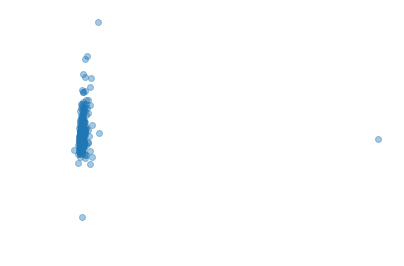

In [14]:
y_predict = line_fitter.predict(x_test)
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("real")
plt.ylabel("predict")
# plt.title("추이")
plt.show()

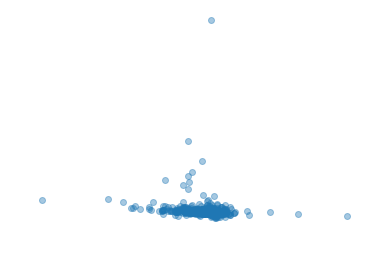

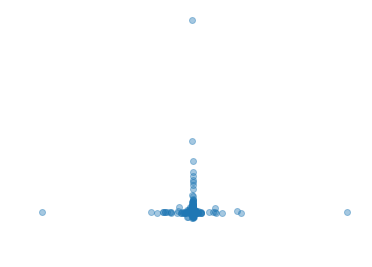

In [16]:
# x1: 이동평균 score와  y:증감 추이의 관계
# x2: 청산가치와  y:증감 추이의 관계
plt.scatter(df_part4_copy[['MA_score']], df_part4_copy[['증감per시가총액']], alpha=0.4)
plt.xlabel("MA_score")
plt.show()

plt.scatter(df_part4_copy[['청산가치']], df_part4_copy[['증감per시가총액']],alpha=0.4)
plt.xlabel("WB_score")
plt.show()

# 1번 그래프 = MA수치가 높다고 해서, 증감율이 높아지지 않는 경향을 보임
# 2번 그래프 = 2번 그래프도 마찬가지로 청산가치로 높아진다고 해서, 증감율이 높아지지 않는 경향을 보임 ()

In [17]:
#우리 모델의 점수
line_fitter.score(x_train,y_train)

0.07757855384309109

# 시각화

In [18]:
word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf",
                       width=2000, height=1000, 
#                        prefer_horizontal= 1.0, 
                       background_color='white')

### 6조의 추천 종목

In [19]:
# Data frame을 Dict로 바꾸는 과정
x1_dict = df_part4[['종목명','MA_score']]
x1_dict = x1_dict[x1_dict['MA_score']>0]
x1_dict['MA_score'] = x1_dict['MA_score']**2 # 고저 차이의 극대화를 위한 Square
x1_dict = x1_dict.round().astype({'MA_score': 'int'}) # 정수값으로 변환
x1_dict = x1_dict.values.tolist()
x1_dict = dict(x1_dict)
x1_dict
word_cloud.generate_from_frequencies(x1_dict)

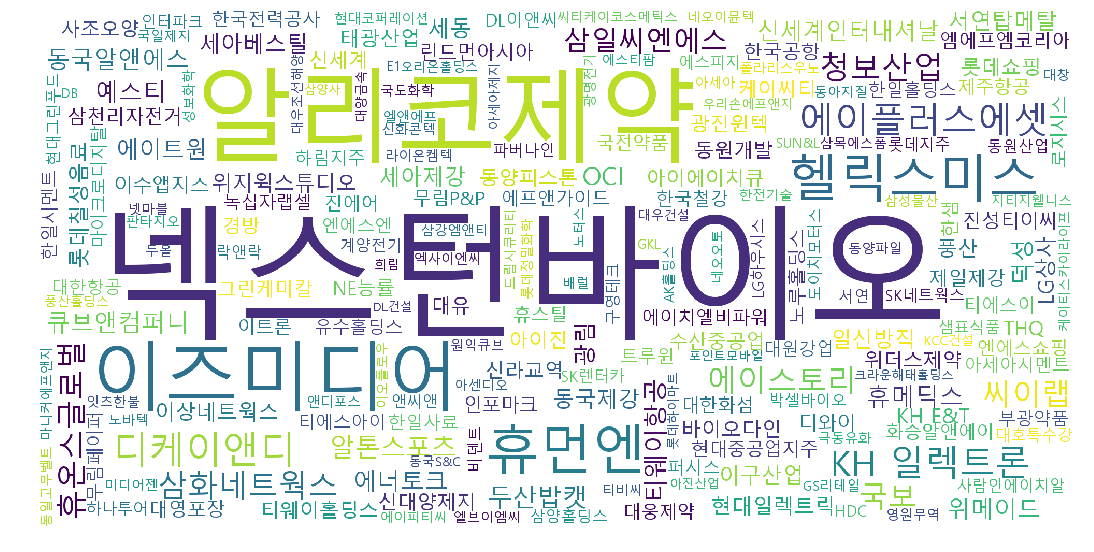

In [20]:
plt.figure(figsize=(15,15))  
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# 워런버핏의 추천 종목 (청산가치)

In [21]:

x2_dict = df_part4[['종목명','청산가치']]
x2_dict = x2_dict[x2_dict['청산가치']>0]
x2_dict['청산가치'] = x2_dict['청산가치']**2
x2_dict = x2_dict.round().astype({'청산가치': 'int'})
x2_dict = x2_dict.values.tolist()
x2_dict = dict(x2_dict)
x2_dict
word_cloud.generate_from_frequencies(x2_dict)

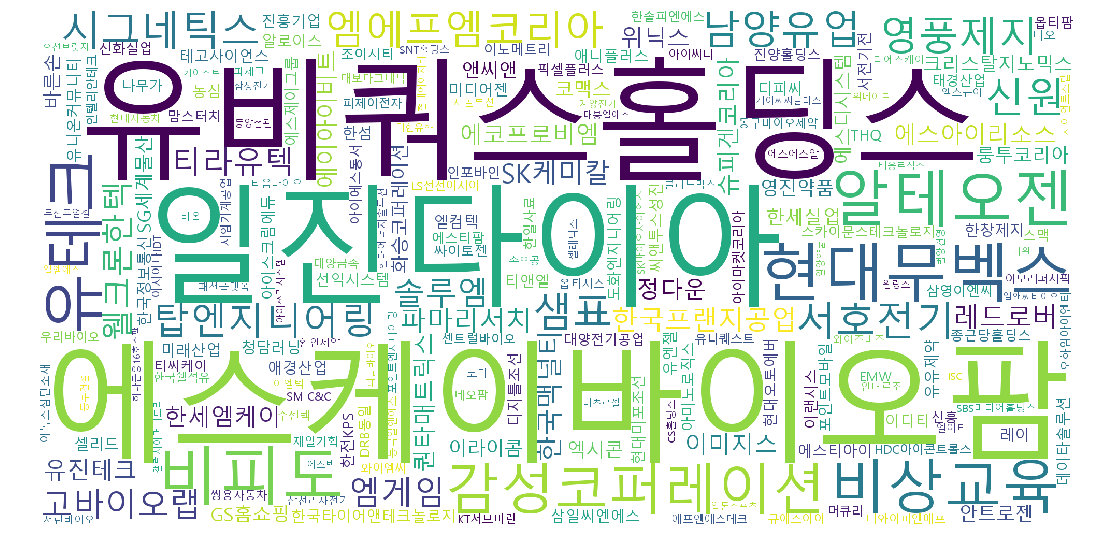

In [22]:
plt.figure(figsize=(15,15))  
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### 실제 고성과 종목

In [23]:

y_dict = df_part4[['종목명','증감per시가총액']]
y_dict = y_dict[y_dict['증감per시가총액']>0]
y_dict['증감per시가총액'] = (y_dict['증감per시가총액']*10)**2 # data값 scaling
y_dict = y_dict.round().astype({'증감per시가총액': 'int'})
y_dict = y_dict.values.tolist()
y_dict = dict(y_dict)
y_dict
word_cloud.generate_from_frequencies(y_dict)

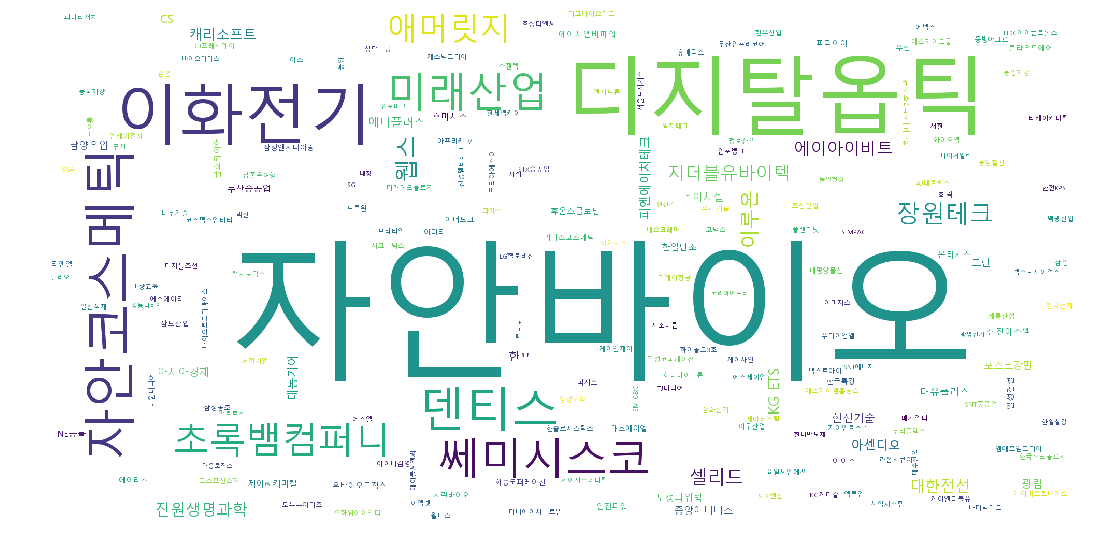

In [24]:
plt.figure(figsize=(15,15))  
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### (Appendix) 회귀분석
http://hleecaster.com/ml-multiple-linear-regression-example/